# **Digit 데이터를 이용한 <span style="color:darkgreen">뉴럴네트워크</span> 문제**
---

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시오.**<br>
> 반드시 코드와 주석을 읽고 문제를 푸시오. <br>
> 출력된 데이터 설명을 **반드시** 읽고 문제를 푸시오.

---



In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.images # 인풋으로 사용할 데이터.
y = digits.target # 아웃풋으로 사용할 데이터.

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Q1. 다음 조건에 맞추어 데이터를 분할하시오.
---------------------------
* 변수명 규칙 : x_train, x_test, y_train, y_test
* train : test = 9 : 1
* y의 클래스가 골고루 분할이 되도록 stratify하게 분할한다.
* random state, seed등은 2021로 고정.
---------------------------

In [62]:
####################
## your code here ##
####################

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.1, stratify=y, random_state=2021)

# Q2. 모든 x들을 min-max scaling 하시오.
---------------------------
* 모든 트레이닝 규칙은 트레이닝 셋을 이용하여 찾아낸다.
* 제대로 스케일링 되었는지, 결과도 확인한다.
---------------------------

In [63]:
####################
## your code here ##
####################

max_ = x_train.max()
min_ = x_test.min()

x_train = ( x_train - min_ )/( max_ - min_ )
x_test =( x_test - min_ )/( max_ - min_ )

# Q3. 실행할 때마다 트레이닝셋의 이미지 하나를 랜덤하게 시각화 하는 코드를 작성하시오.
--------------------
* 그 이미지가 어떤 클래스인지도 같이 출력하는 코드를 작성하시오.
----------

아래 이미지는 5입니다.


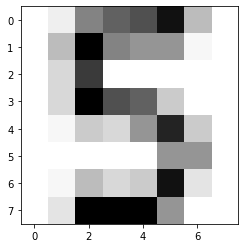

In [64]:
####################
## your code here ##
####################

id = np.random.randint(0, len(x_train))

print(f"아래 이미지는 {y_train[id]}입니다.")
plt.imshow(x_train[id], cmap='Greys')
plt.show()

# Q4. y들을 원핫인코딩 하시오.
----------------
* 모든 전처리 규칙은 트레이닝셋을 이용하여 찾는다.
--------------

In [65]:
####################
## your code here ##
####################

from tensorflow.keras.utils import to_categorical

num_ca = len(set(y_train))

y_train = to_categorical(y_train, num_ca)
y_test = to_categorical(y_test, num_ca)

# Q5. 다음 조건에 맞추어 뉴럴넷을 모델링 하시오.
------------------------------
* model1 에 모델을 선언해둔다.
* 컴파일까지 마친다.
    - 모니터링용 지표로 accuracy를 둔다.
* 모델 구조는 아래와 같다.
    - x의 모양에 맞는 적절한 인풋레이어
    - Fully connected layer로 연결하기 위한 모양변환 레이어
    - Fully connected layer, 64개 노드, swish
    - Fully connected layer, 64개 노드, swish
    - 적절한 아웃풋 레이어
-----------------------------------

In [66]:
####################
## your code here ##
####################

keras.backend.clear_session()

il = keras.layers.Input(shape=(8,8))
hl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(64, 'swish')(hl)
hl = keras.layers.Dense(64, 'swish')(hl)
ol = keras.layers.Dense(10, 'softmax')(hl)

model1 = keras.models.Model(il, ol)

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8)]            0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


# Q6. 다음 조건에 맞추어 model1을 얼리스토핑을 이용하여 학습시키시오.
--------------
* epochs = 10000
* batch size는 256
* 10번 연속 개선이 없으면 stop
    - loss가 유지만 되어도 개선됨으로 간주
* 얼리스토핑시, 가장 성능이 좋았던 가중치로 복구.
* 벨리데이션 셋은, 트레이닝 셋의 15%를 사용.
----------

In [67]:
####################
## your code here ##
####################

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0, patience=10,
                   verbose=1, restore_best_weights=True)

model1.fit(x_train, y_train, epochs=10000, batch_size=256, validation_split=0.15,
           callbacks=[es], verbose=1)

Epoch 1/10000
6/6 [==============================] - 1s 36ms/step - loss: 2.3193 - accuracy: 0.0677 - val_loss: 2.2586 - val_accuracy: 0.1811
Epoch 2/10000
6/6 [==============================] - 0s 7ms/step - loss: 2.2342 - accuracy: 0.2817 - val_loss: 2.1878 - val_accuracy: 0.4362
Epoch 3/10000
6/6 [==============================] - 0s 6ms/step - loss: 2.1550 - accuracy: 0.4927 - val_loss: 2.1092 - val_accuracy: 0.5844
Epoch 4/10000
6/6 [==============================] - 0s 7ms/step - loss: 2.0665 - accuracy: 0.6397 - val_loss: 2.0128 - val_accuracy: 0.7037
Epoch 5/10000
6/6 [==============================] - 0s 7ms/step - loss: 1.9600 - accuracy: 0.7220 - val_loss: 1.8945 - val_accuracy: 0.7366
Epoch 6/10000
6/6 [==============================] - 0s 7ms/step - loss: 1.8298 - accuracy: 0.7351 - val_loss: 1.7481 - val_accuracy: 0.7572
Epoch 7/10000
6/6 [==============================] - 0s 6ms/step - loss: 1.6694 - accuracy: 0.7613 - val_loss: 1.5702 - val_accuracy: 0.7654
Epoch 8/1000

# Q7. 다음 조건에 맞추어 뉴럴넷을 모델링 하시오.
------------------------------
* model2 에 모델을 선언해둔다.
* 컴파일까지 마친다.
    - 모니터링용 지표로 accuracy를 둔다.
* 모델 구조는 아래와 같다.
    - x의 모양에 맞는 적절한 인풋레이어
    - Fully connected layer로 연결하기 위한 모양변환 레이어
    - Fully connected layer, 128개 노드, swish
    - Batch normalization
    - drop out : drop rate 25%
    - Fully connected layer, 128개 노드, swish
    - Batch normalization
    - drop out : drop rate 25%
    - 적절한 아웃풋 레이어
-----------------------------------

In [68]:
####################
## your code here ##
####################

il = keras.layers.Input(shape=(8,8))
hl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(128, 'swish')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.25)(hl)
hl = keras.layers.Dense(128, 'swish')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.25)(hl)
ol = keras.layers.Dense(10, 'softmax')(hl)

model2 = keras.models.Model(il, ol)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 8)]            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512 

# Q8. 다음 조건에 맞추어 model2을 얼리스토핑을 이용하여 학습시키시오.
--------------
* epochs = 10000
* batch size는 256
* 10번 연속 개선이 없으면 stop
    - loss가 유지만 되어도 개선됨으로 간주
* 얼리스토핑시, 가장 성능이 좋았던 가중치로 복구.
* 벨리데이션 셋은, 트레이닝 셋의 15%를 사용.
----------

In [69]:
####################
## your code here ##
####################

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0, patience=10,
                   verbose=1, restore_best_weights=True)

model2.fit(x_train, y_train, epochs=10000, batch_size=256, validation_split=0.15,
           callbacks=[es], verbose=1)

Epoch 1/10000
6/6 [==============================] - 1s 42ms/step - loss: 2.7400 - accuracy: 0.2016 - val_loss: 2.1702 - val_accuracy: 0.3786
Epoch 2/10000
6/6 [==============================] - 0s 10ms/step - loss: 1.2324 - accuracy: 0.6019 - val_loss: 2.0442 - val_accuracy: 0.6584
Epoch 3/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.7179 - accuracy: 0.7656 - val_loss: 1.9445 - val_accuracy: 0.7613
Epoch 4/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.4887 - accuracy: 0.8552 - val_loss: 1.8696 - val_accuracy: 0.7984
Epoch 5/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.3649 - accuracy: 0.8785 - val_loss: 1.8121 - val_accuracy: 0.7860
Epoch 6/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.3077 - accuracy: 0.9178 - val_loss: 1.7637 - val_accuracy: 0.7531
Epoch 7/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2585 - accuracy: 0.9229 - val_loss: 1.7190 - val_accuracy: 0.7449
Epoch 8/100

# Q9. 테스트셋 위에서 두 모델을 비교하시오.
---------------------------------
* 두 모델의 accuracy를 출력한다.
-------------------------

In [72]:
####################
## your code here ##
####################

model1.evaluate(x_test, y_test), model2.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9889


([0.10789534449577332, 0.9611111283302307],
 [0.07070343941450119, 0.9888888597488403])

# Q10. 성능이 더 좋은 모델을 이용해, 테스트 이미지를 시각화 하시오.
----------------------------
* 랜덤하게 테스트 이미지 한장을 시각화 한다.
* 그 이미지가 실제 어떤 클래스인지 출력한다.
    - 원핫 인코딩 된 정보를 출력하지 않는다.
* 모델이 예측한 클래스도 같이 출력한다.
    - 확률 정보를 출력하지 않는다.
-----------------------

아래 이미지는 : 1 입니다.
모델의 예측은 : 1 입니다.


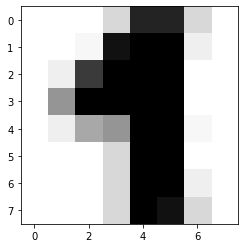

In [83]:
####################
## your code here ##
####################

id = id = np.random.randint(0, len(x_test))

y_pred = model2.predict(x_test[id:id+1])

print(f"아래 이미지는 : {y_test[id].argmax()} 입니다.")
print(f"모델의 예측은 : {y_pred.argmax()} 입니다.")
plt.imshow(x_test[id], cmap='Greys')
plt.show()